In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [2]:
(x_train_load, y_train_load), (x_test_load, y_test_load) = mnist.load_data()
# 處理數據
x_train_load = x_train_load[:500]
y_train_load = y_train_load[:500]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)


(20, 28, 28)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [3]:
# Data normalization

x_train = x_train_load.reshape((x_train_load.shape[0], 28, 28, 1)).astype('float32') / 255     # ==> 39s
x_test = x_test_load.reshape((x_test_load.shape[0], 28, 28, 1)).astype('float32') / 255

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train_load)
y_test = to_categorical(y_test_load)
print(x_test.shape)
print(y_test)


(20, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
# 建立模型
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(20, activation='relu'),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/50
8/8 [==============================] - 3s 150ms/step - loss: 71.0339 - accuracy: 0.1800 - val_loss: 34.7567 - val_accuracy: 0.0500
Epoch 2/50
8/8 [==============================] - 0s 17ms/step - loss: 18.8521 - accuracy: 0.2440 - val_loss: 9.9492 - val_accuracy: 0.1500
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 6.4083 - accuracy: 0.3100 - val_loss: 4.3298 - val_accuracy: 0.2500
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 3.2006 - accuracy: 0.2860 - val_loss: 2.4853 - val_accuracy: 0.2500
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 2.4459 - accuracy: 0.2800 - val_loss: 2.0540 - val_accuracy: 0.3000
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 2.2673 - accuracy: 0.2620 - val_loss: 1.9560 - val_accuracy: 0.3500
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 2.1648 - accuracy: 0.2700 - val_loss: 1.8710 - val_accuracy: 0.3500
Epoch 8/50
8/8 [=======

In [11]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred_label = np.argmax(y_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

16/16 [==============================] - 0s 5ms/step
Confusion Matrix:
[[17  0  0  0  0  2  0  0  0 31]
 [ 0 59  3  0  0  1  0  0  0  3]
 [ 0  0 20  0  0  0  0  0  0 32]
 [ 0  0  8 29  0  0  0  1  0 12]
 [ 0  0  0  2  1  0  2  0  0 47]
 [ 0  2  2  0  0 14  0  0  0 21]
 [ 0  0  0  0  0  1  3  0  0 41]
 [ 5  0  0  1  0  0  0 39  0  7]
 [ 0  0  2  0  0  0  0  1  1 35]
 [ 3  0  0  1  1  0  0  1  0 49]]


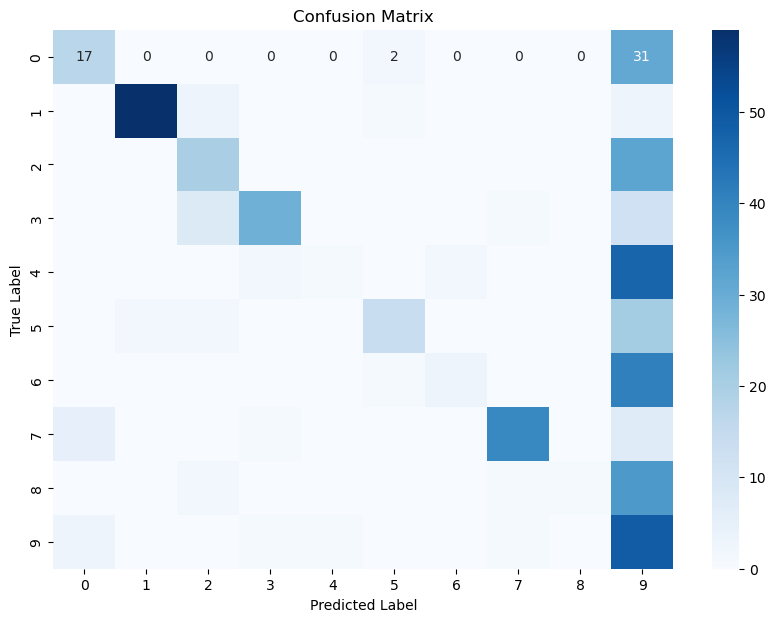

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

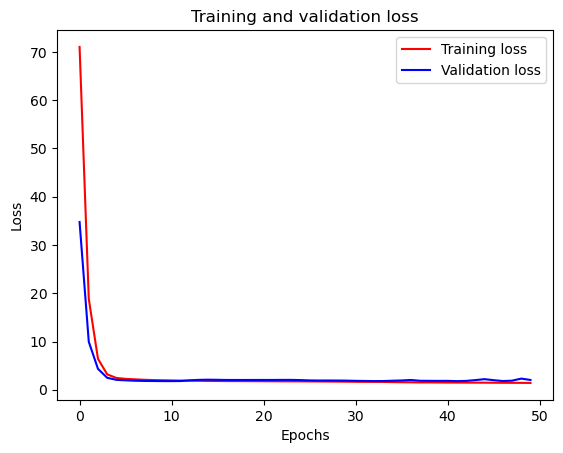

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test a|ccuracy:', test_acc)

1/1 [==============================] - 0s 78ms/step - loss: 2.0293 - accuracy: 0.3000
Test a|ccuracy: 0.30000001192092896


In [15]:
y_pred = model.predict(x_test)
print(y_pred.shape)

# print(|y_pred)
y_pred_label = np.argmax(y_pred, axis=1)    
print('y_pred: ', y_pred_label)

1/1 [==============================] - 0s 49ms/step
(20, 10)
y_pred:  [7 5 1 9 9 1 3 6 9 7 9 9 9 9 1 1 0 7 2 9]


In [16]:
# 找出預測錯誤的索引
y_pred = model.predict(x_test)
print('y_shape: ', y_pred.shape)

y_pred_label = np.argmax(y_pred, axis=1)  # axis=1：沿著行查找每行的最大值的索引。axis=0：沿著列查找每列的最大值的索引。
y_test_label = np.argmax(y_test, axis=1)

print('y_pred: ', y_pred_label)
print('y_test: ', y_test_label)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Index of Prediction errors:  {errors} ')
print(f'Total number of prediction errors: {len(errors)}')

1/1 [==============================] - 0s 48ms/step
y_shape:  (20, 10)
y_pred:  [7 5 1 9 9 1 3 6 9 7 9 9 9 9 1 1 0 7 2 9]
y_test:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Index of Prediction errors:  [ 1  3  4  6  7  8  9 10 11 13 15 16 18 19] 
Total number of prediction errors: 14


## Exercise : Try to visualize the wrong predictions

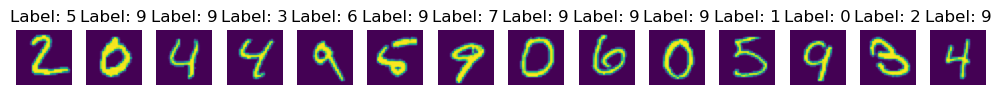

In [40]:
# 使用 matplotlib 顯示多張圖像
# 設置圖像數量

num_images = len(errors)

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_test_load[errors[i]])
    ax.set_title(f'Label: {y_pred_label[errors[i]]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()